In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = "../datasets/kddcup99_csv.csv"

In [3]:
df = pd.read_csv(file_path)
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


In [4]:
print(f"dataset Shape:{df.shape}")

dataset Shape:(494020, 42)


In [5]:
print(df.info())

<class 'pandas.DataFrame'>
RangeIndex: 494020 entries, 0 to 494019
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494020 non-null  int64  
 1   protocol_type                494020 non-null  str    
 2   service                      494020 non-null  str    
 3   flag                         494020 non-null  str    
 4   src_bytes                    494020 non-null  int64  
 5   dst_bytes                    494020 non-null  int64  
 6   land                         494020 non-null  int64  
 7   wrong_fragment               494020 non-null  int64  
 8   urgent                       494020 non-null  int64  
 9   hot                          494020 non-null  int64  
 10  num_failed_logins            494020 non-null  int64  
 11  logged_in                    494020 non-null  int64  
 12  lnum_compromised             494020 non-null  int64  
 13  lroot_shel

In [6]:
print(df.duplicated().sum())
print(f"reaining rows after duplicates:{494020-348435}")

348435
reaining rows after duplicates:145585


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,494020.0,47.979400,707.747185,0.0,0.00,0.0,0.00,58329.0
src_bytes,494020.0,3025.615744,988219.101225,0.0,45.00,520.0,1032.00,693375640.0
dst_bytes,494020.0,868.530774,33040.034672,0.0,0.00,0.0,0.00,5155468.0
land,494020.0,0.000045,0.006673,0.0,0.00,0.0,0.00,1.0
wrong_fragment,494020.0,0.006433,0.134805,0.0,0.00,0.0,0.00,3.0
urgent,494020.0,0.000014,0.005510,0.0,0.00,0.0,0.00,3.0
hot,494020.0,0.034519,0.782103,0.0,0.00,0.0,0.00,30.0
num_failed_logins,494020.0,0.000152,0.015520,0.0,0.00,0.0,0.00,5.0
logged_in,494020.0,0.148245,0.355343,0.0,0.00,0.0,0.00,1.0
lnum_compromised,494020.0,0.010212,1.798328,0.0,0.00,0.0,0.00,884.0


In [8]:
df.describe(include=["str"]).T

,count,unique,top,freq
protocol_type,494020,3,icmp,283602
service,494020,66,ecr_i,281400
flag,494020,11,SF,378439
label,494020,23,smurf,280790


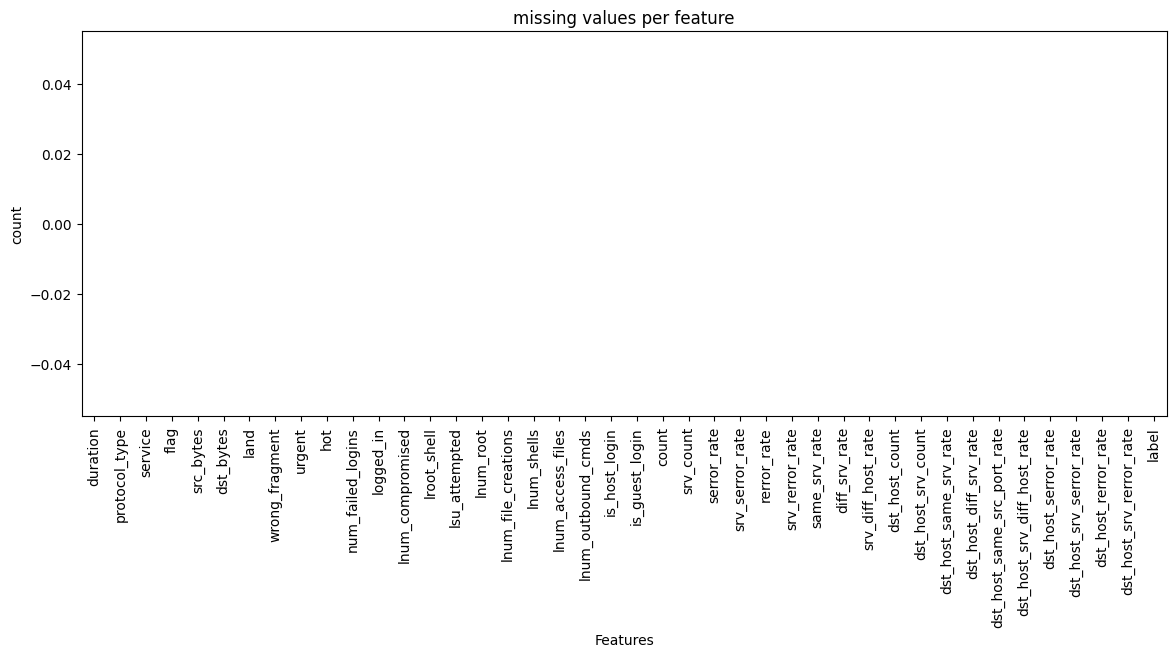

In [9]:
missing_counts = df.isnull().sum()
plt.figure(figsize=(14,5))
missing_counts.plot(kind='bar')
plt.title('missing values per feature')
plt.ylabel('count')
plt.xlabel('Features')
plt.show()

In [10]:
print(df.isnull().sum())

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
lnum_compromised               0
lroot_shell                    0
lsu_attempted                  0
lnum_root                      0
lnum_file_creations            0
lnum_shells                    0
lnum_access_files              0
lnum_outbound_cmds             0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

Text(0.5, 1.0, 'Protocals')

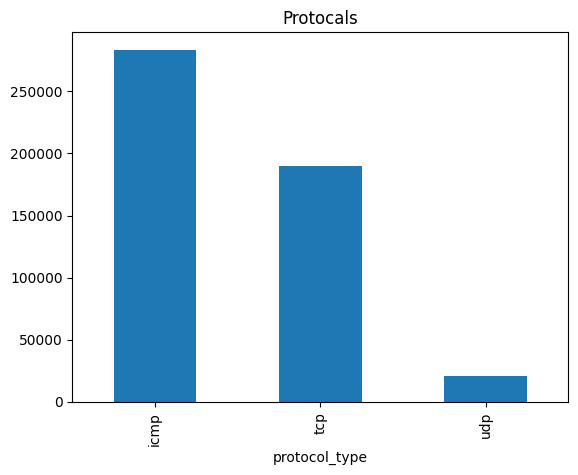

In [11]:
protocal=df["protocol_type"].value_counts()
protocal.plot(kind='bar')
plt.title("Protocals")

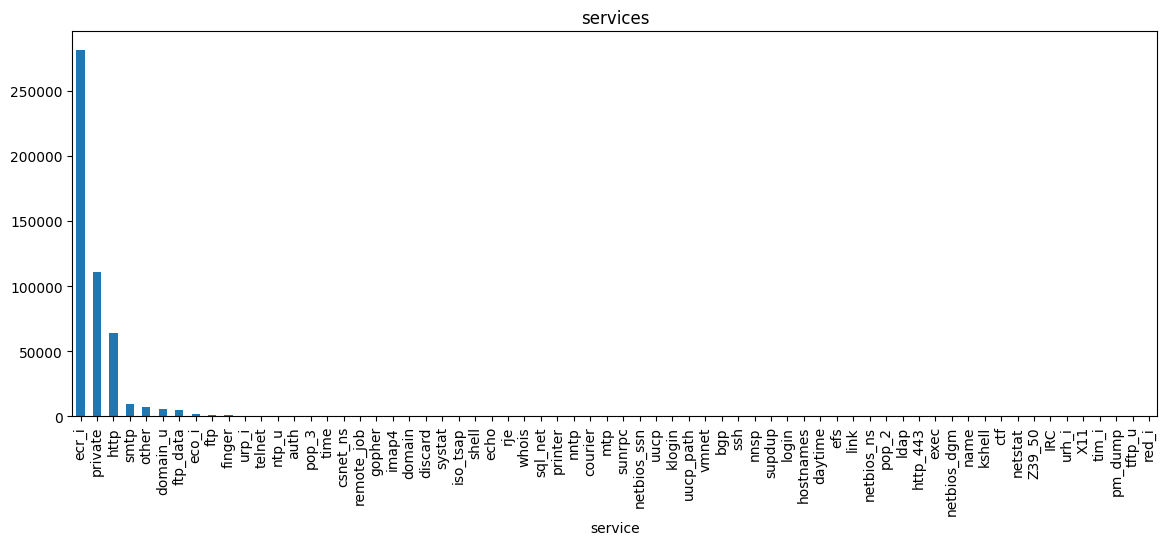

In [12]:
plt.figure(figsize=(14,5))
services = df["service"].value_counts()
services.plot(kind='bar')
plt.title("services")
plt.show()

In [13]:
services

service
ecr_i      281400
private    110893
http        64292
smtp         9723
other        7237
            ...  
X11            11
tim_i           7
pm_dump         1
tftp_u          1
red_i           1
Name: count, Length: 66, dtype: int64

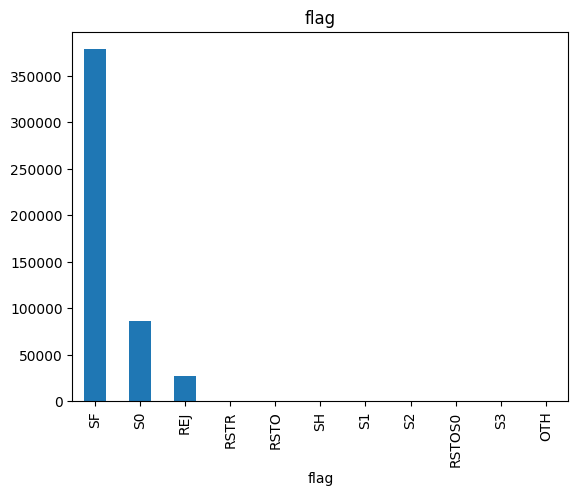

In [14]:
flags=df['flag'].value_counts()
flags.plot(kind='bar')
plt.title("flag")
plt.show()

In [15]:
flags

flag
SF        378439
S0         87007
REJ        26875
RSTR         903
RSTO         579
SH           107
S1            57
S2            24
RSTOS0        11
S3            10
OTH            8
Name: count, dtype: int64

In [16]:
protocal

protocol_type
icmp    283602
tcp     190064
udp      20354
Name: count, dtype: int64

In [17]:
numerical_cols = df.select_dtypes(include=['int64','float']).columns.tolist()

In [18]:
binary_cols = [
    col for col in numerical_cols
    if df[col].nunique() ==2
]
binary_cols

['land', 'logged_in', 'lroot_shell', 'is_guest_login']

In [19]:
numerical_cols = [
    col for col in numerical_cols
    if df[col].nunique()>2
]

In [20]:
numerical_cols

['duration',
 'src_bytes',
 'dst_bytes',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'lnum_compromised',
 'lsu_attempted',
 'lnum_root',
 'lnum_file_creations',
 'lnum_shells',
 'lnum_access_files',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']

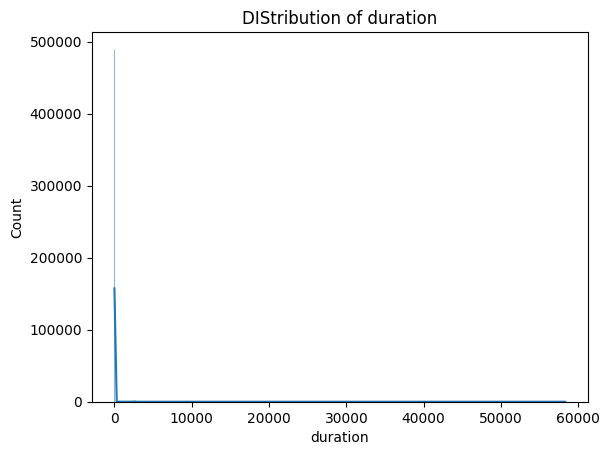

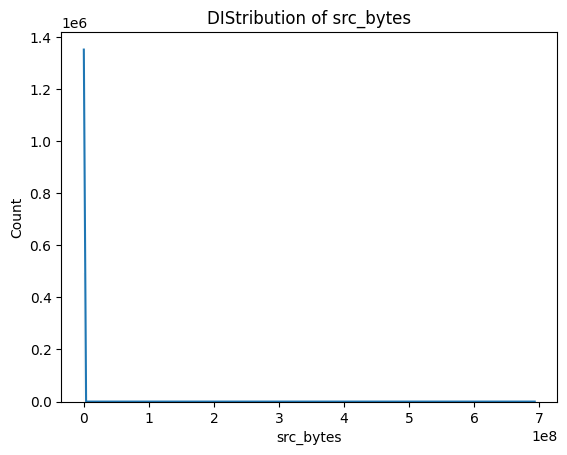

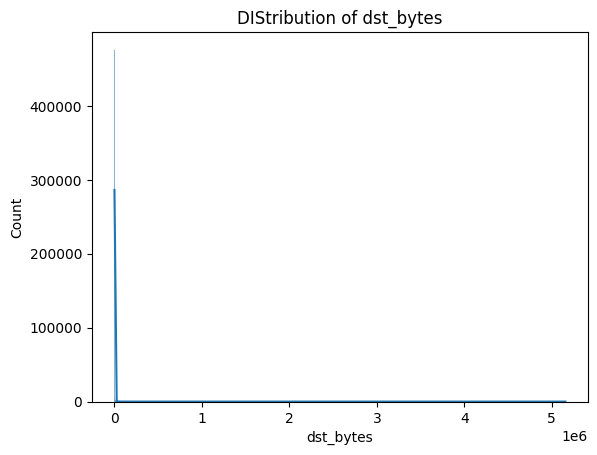

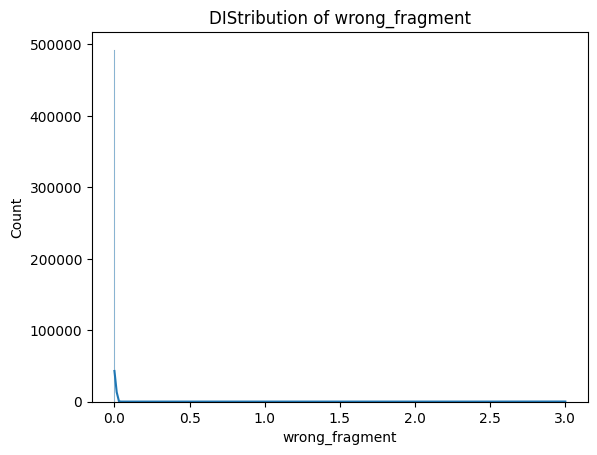

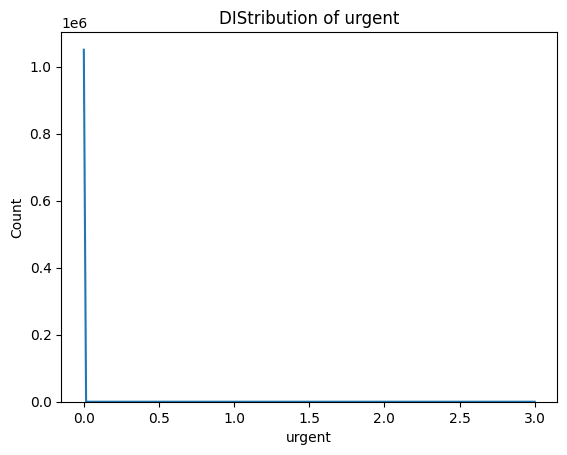

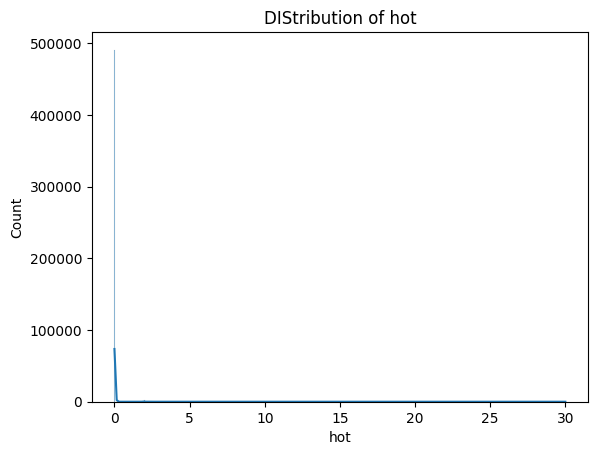

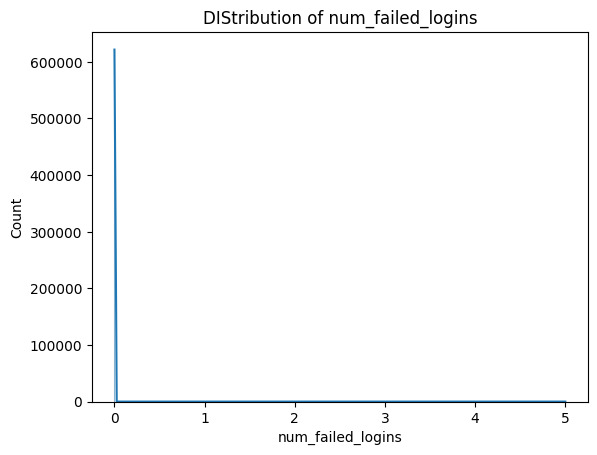

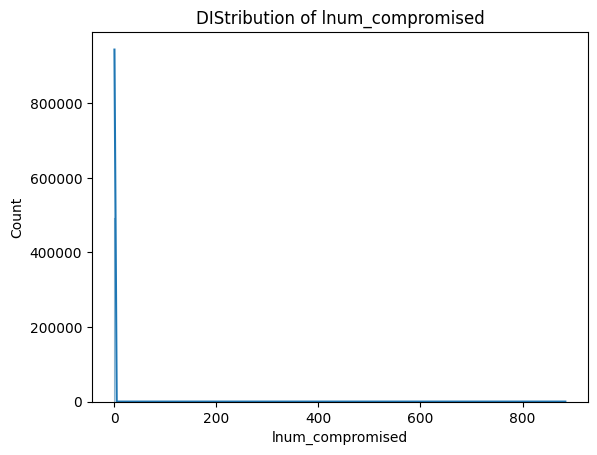

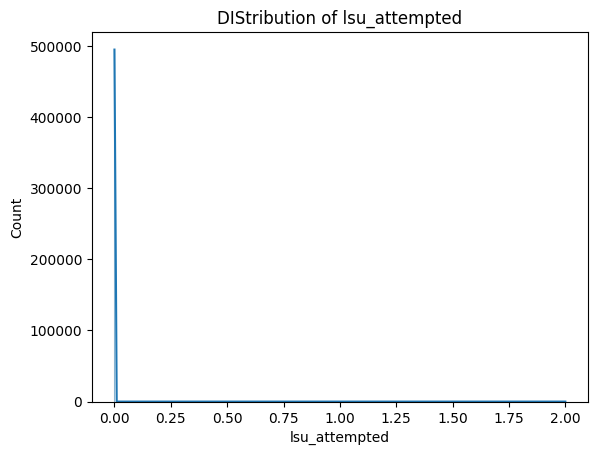

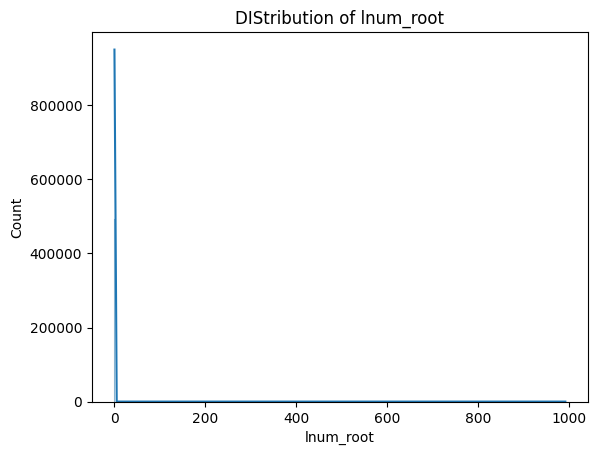

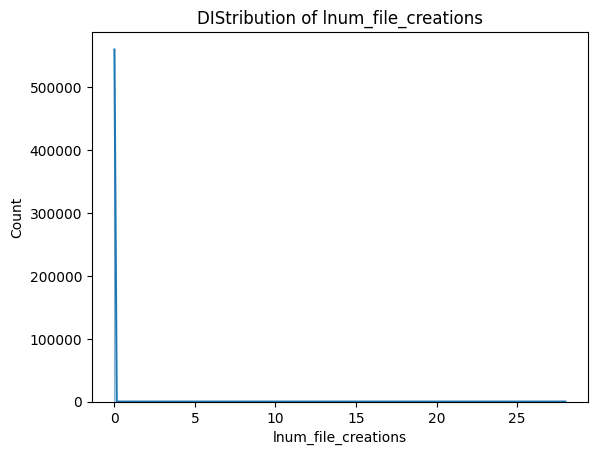

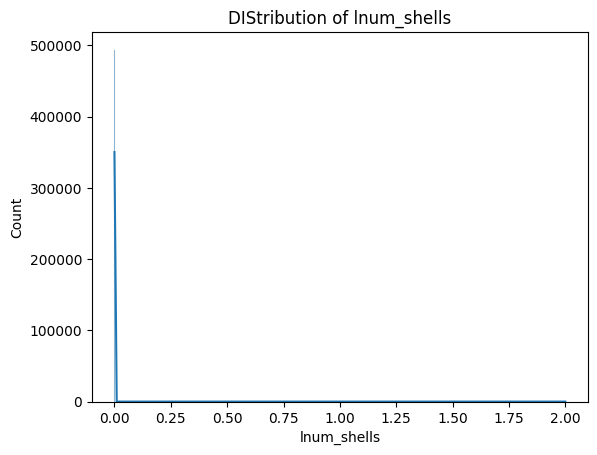

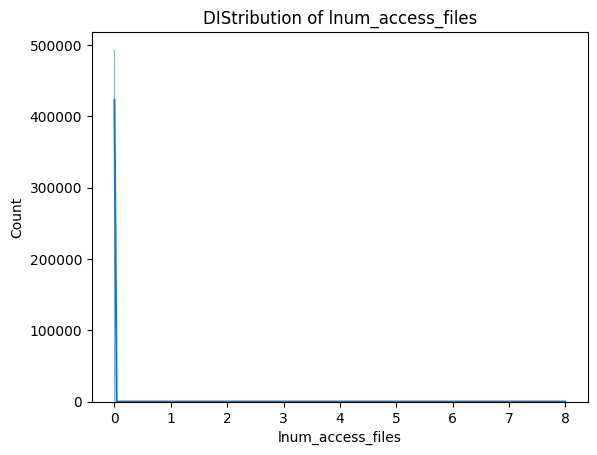

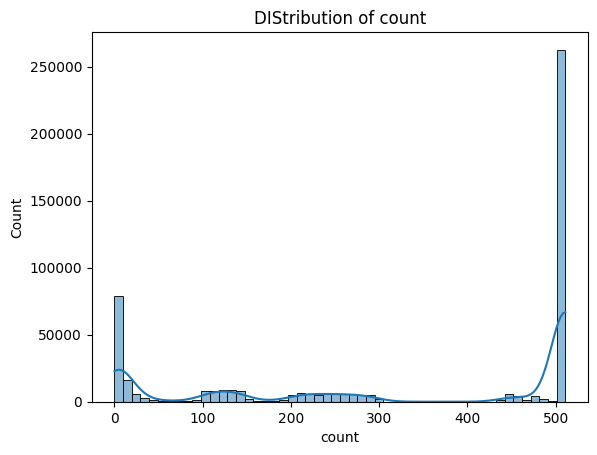

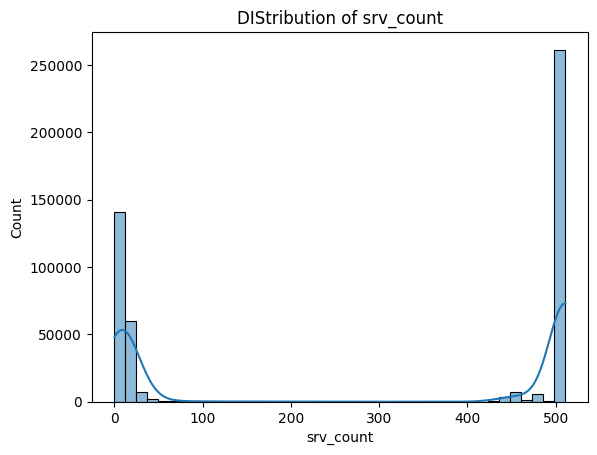

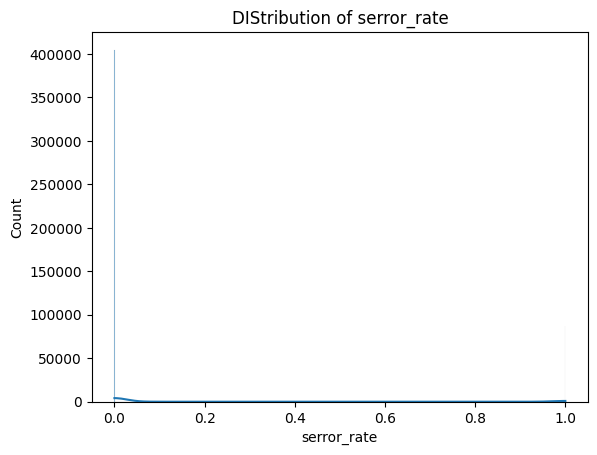

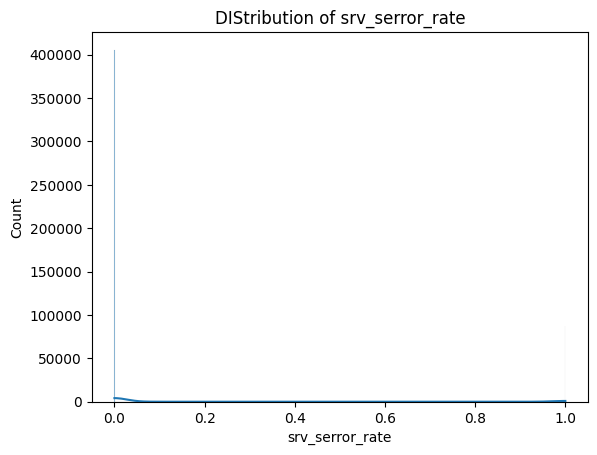

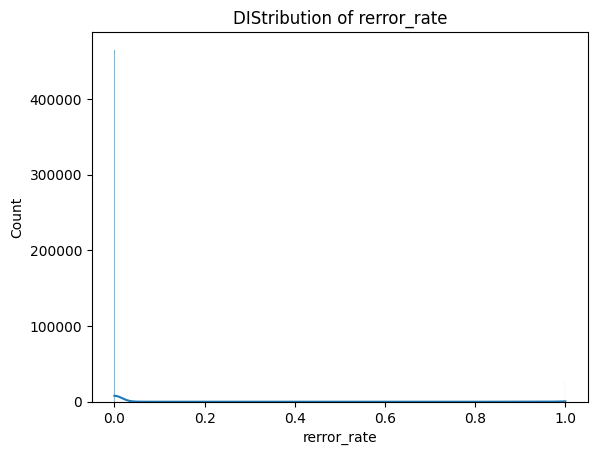

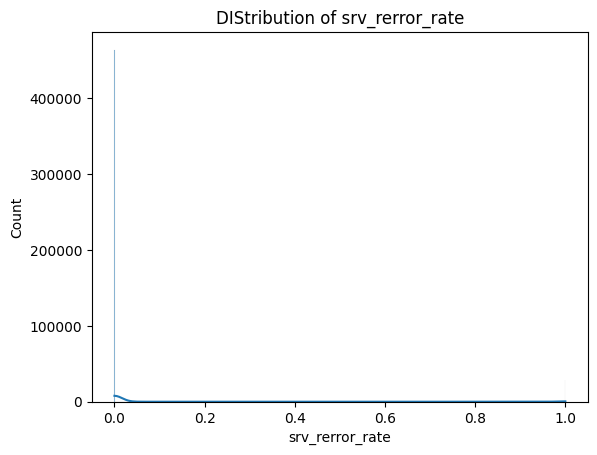

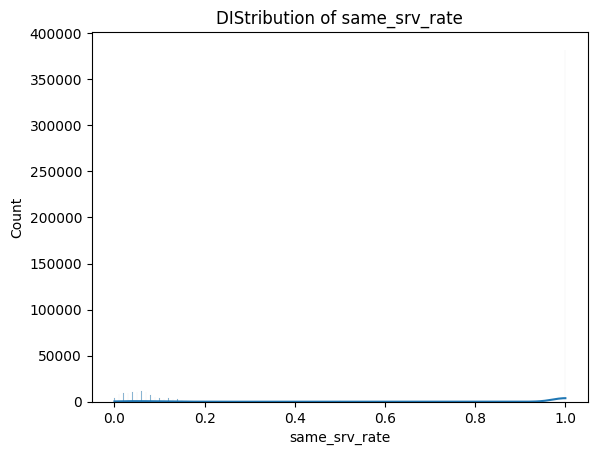

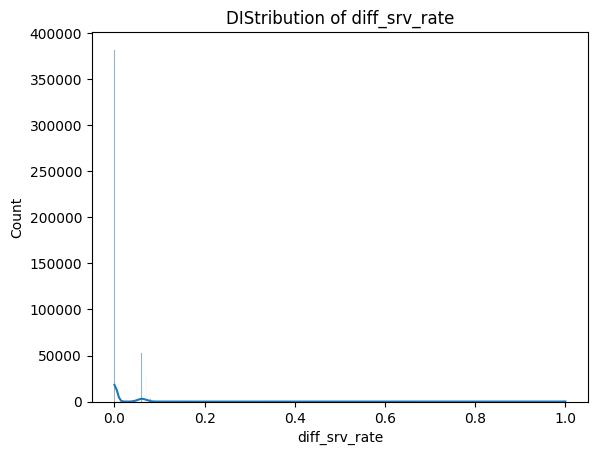

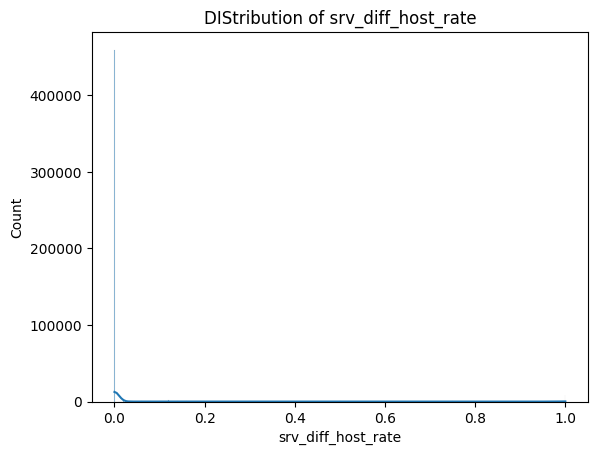

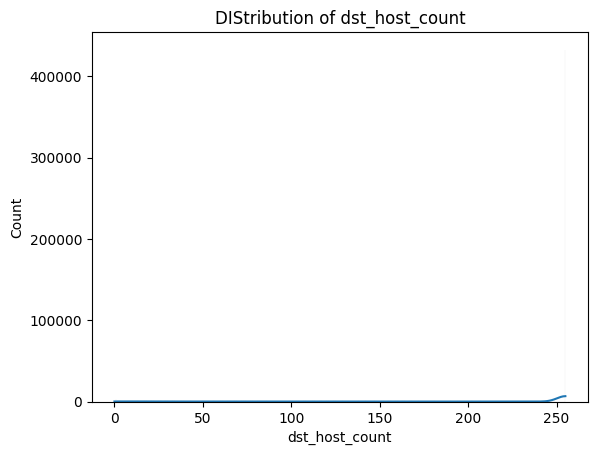

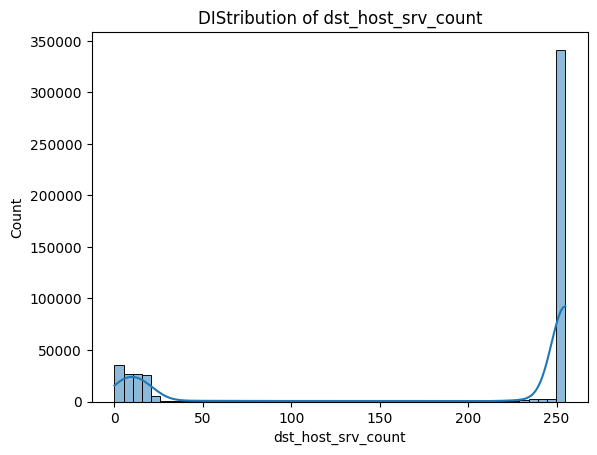

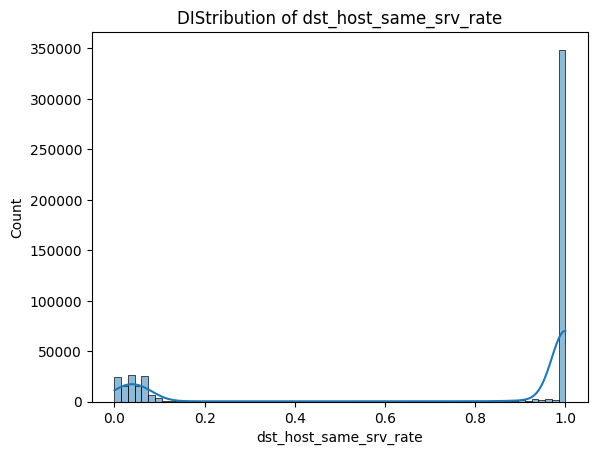

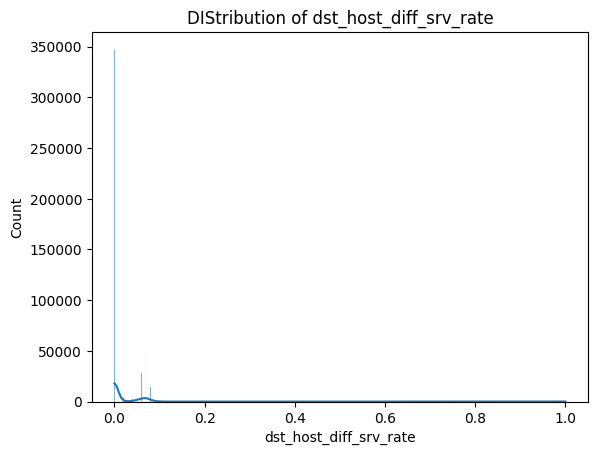

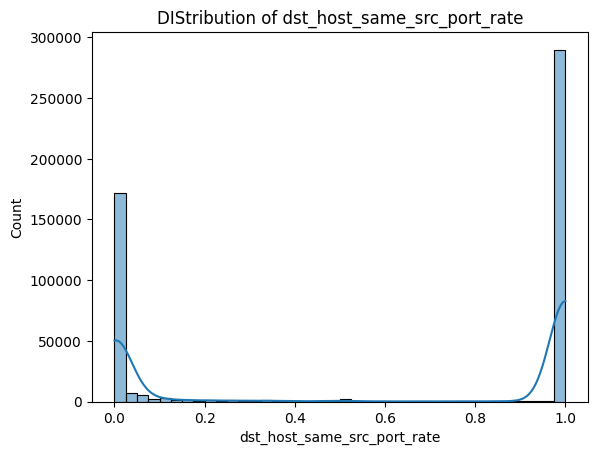

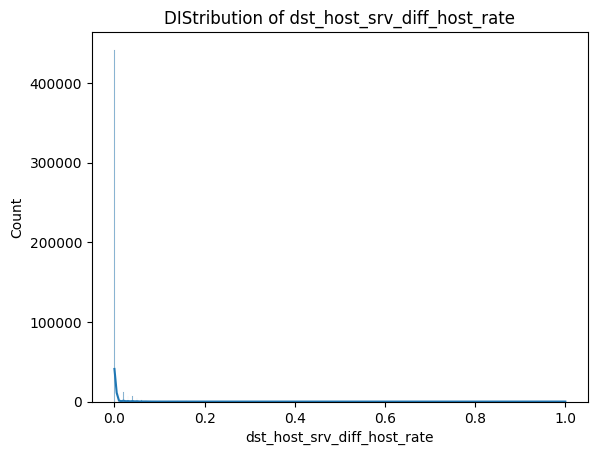

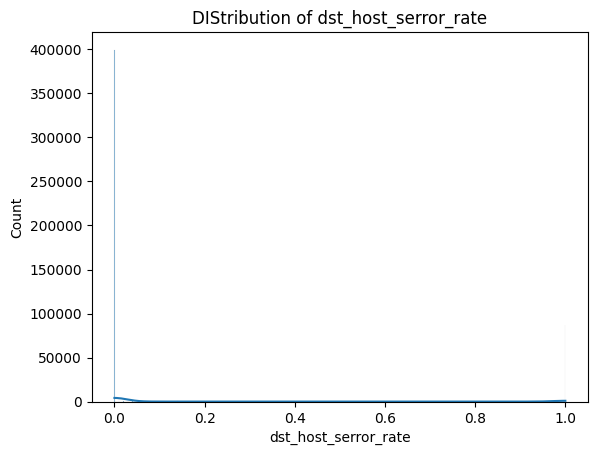

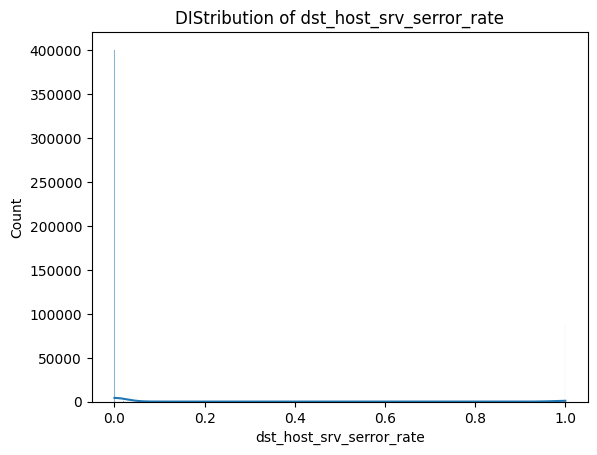

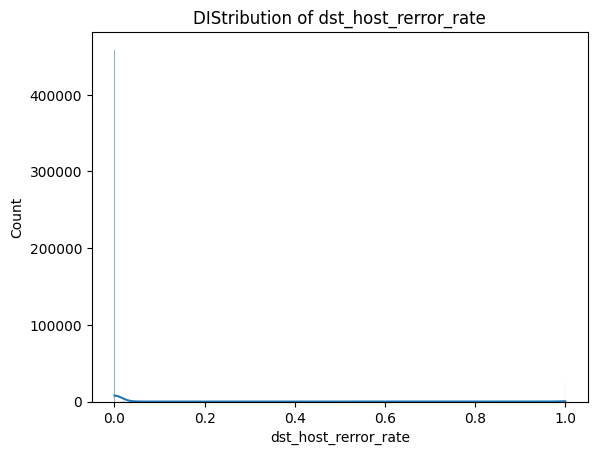

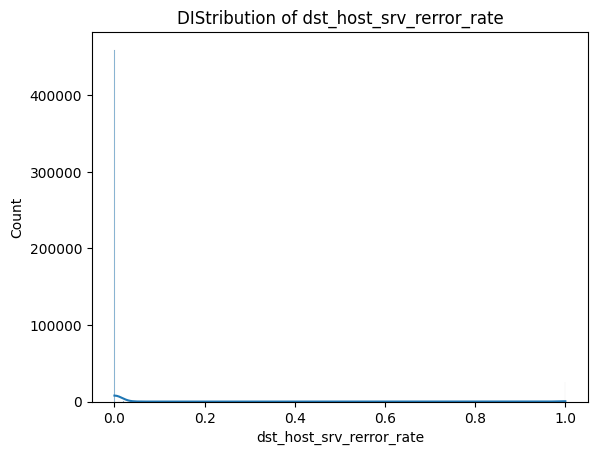

In [21]:
for col in numerical_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f"DIStribution of {col}")
    plt.show()

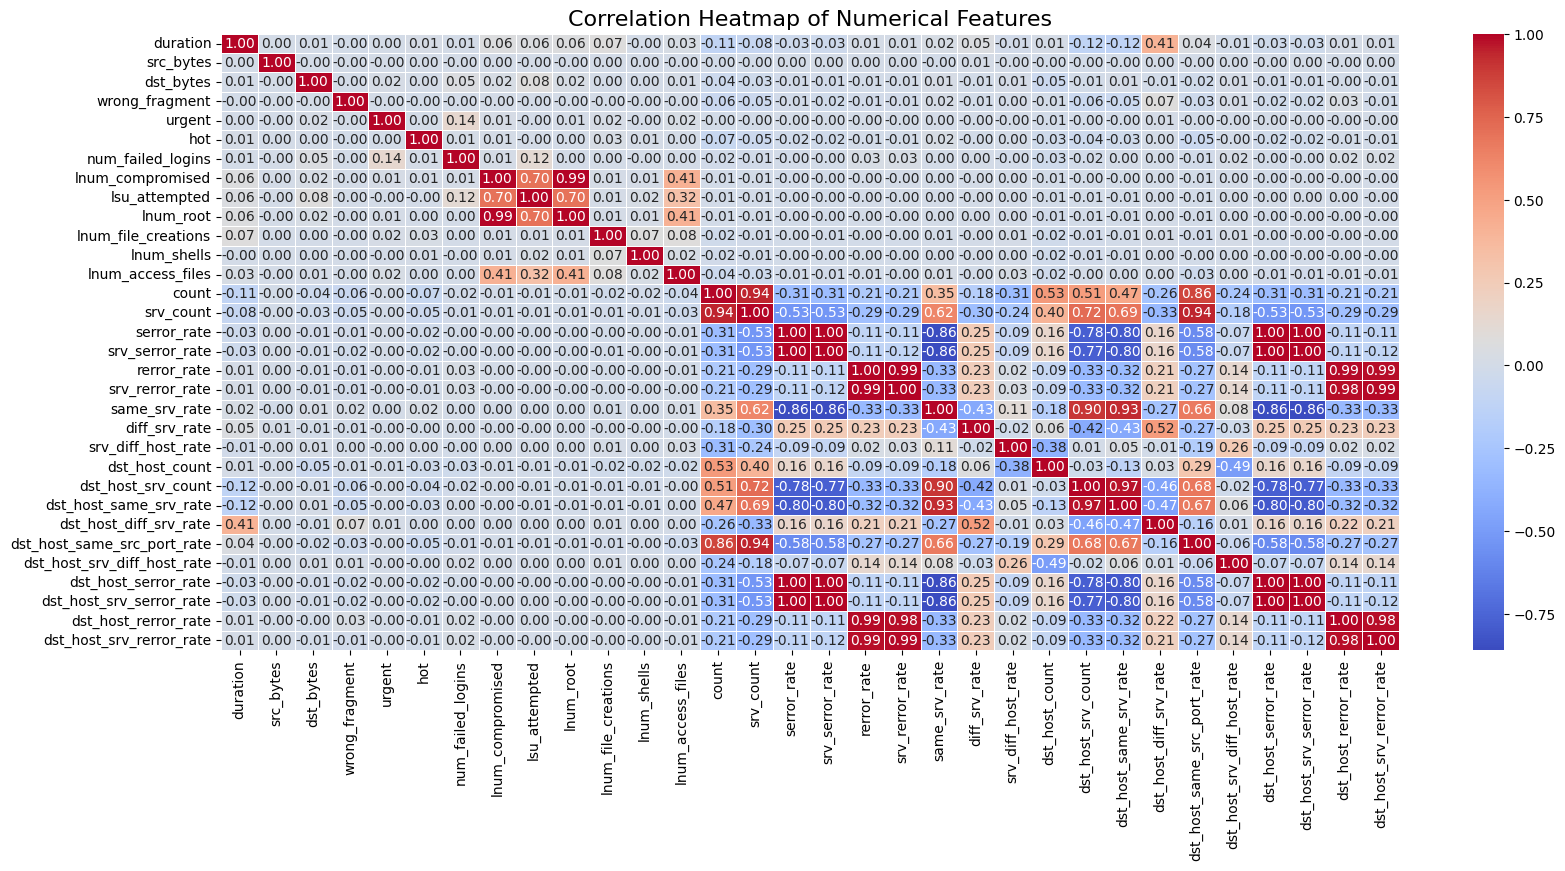

In [22]:
plt.figure(figsize=(19, 8))
sns.heatmap(
    df[numerical_cols].corr(),   
    annot=True,                 
    fmt=".2f",                  
    cmap="coolwarm",             
    cbar=True,                   
    linewidths=0.5               
)
plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.show()

In [23]:
corr_matrix = df[numerical_cols].corr().abs()
threshold = 0.85
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
high_corr_pairs = [
    (col1, col2, upper.loc[col1, col2])
    for col1 in upper.columns
    for col2 in upper.index
    if upper.loc[col1, col2] > threshold
]
high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Feature 1', 'Feature 2', 'Correlation'])
high_corr_df = high_corr_df.sort_values(by='Correlation', ascending=False)
high_corr_df

,Feature 1,Feature 2,Correlation
10,srv_serror_rate,dst_host_srv_serror_rate,0.999304
6,serror_rate,dst_host_serror_rate,0.998673
4,serror_rate,srv_serror_rate,0.998362
21,dst_host_serror_rate,dst_host_srv_serror_rate,0.998156
7,serror_rate,dst_host_srv_serror_rate,0.997849
9,srv_serror_rate,dst_host_serror_rate,0.997835
11,rerror_rate,srv_rerror_rate,0.994731
0,lnum_compromised,lnum_root,0.993828
12,rerror_rate,dst_host_rerror_rate,0.986995
15,srv_rerror_rate,dst_host_srv_rerror_rate,0.986571


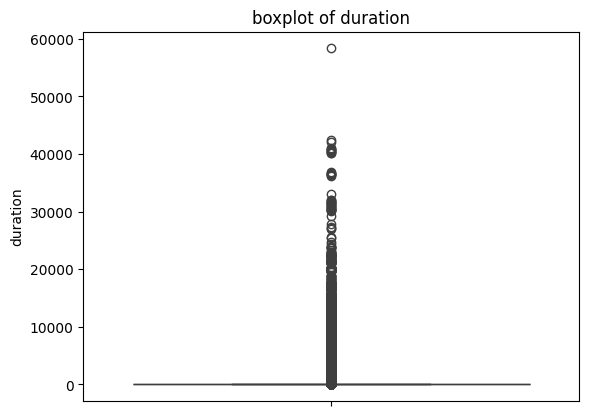

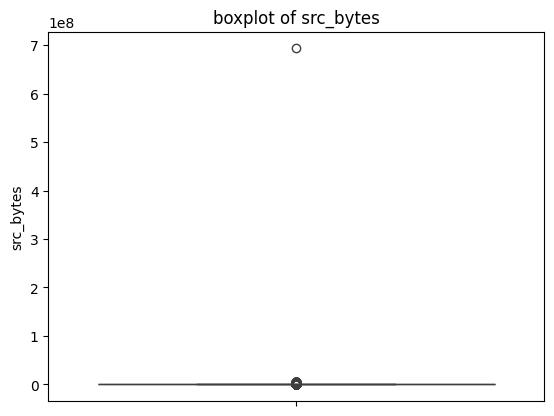

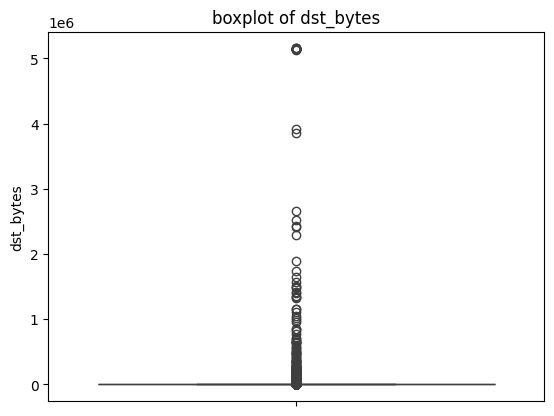

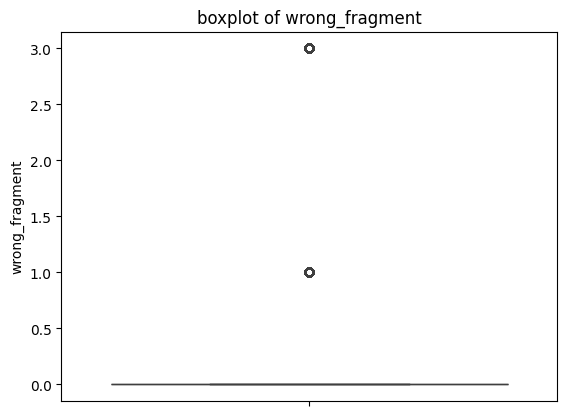

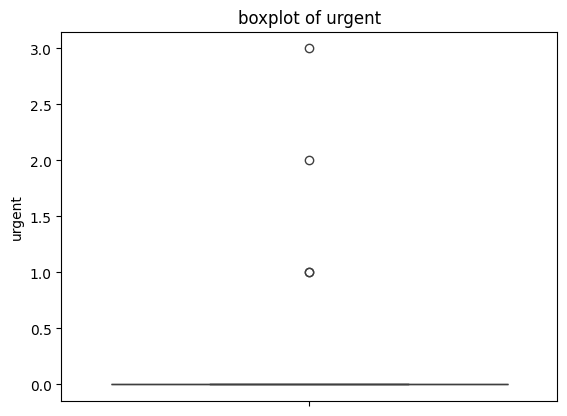

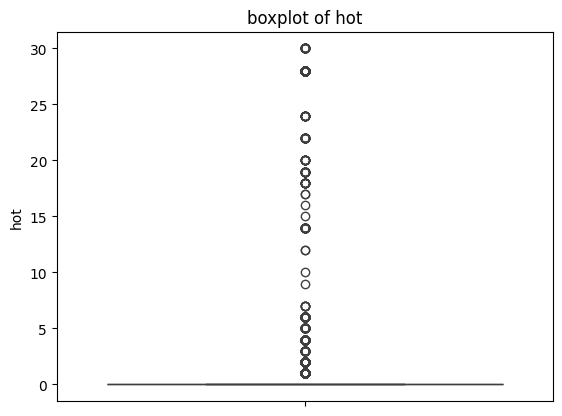

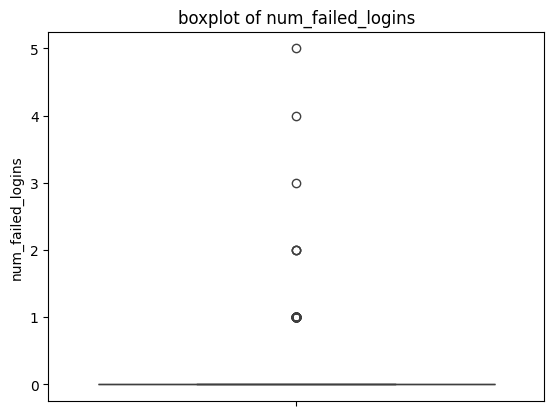

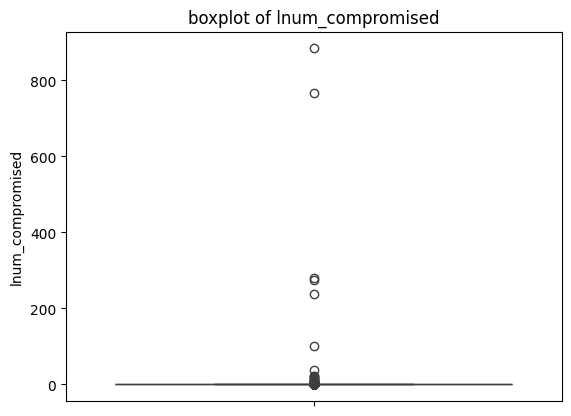

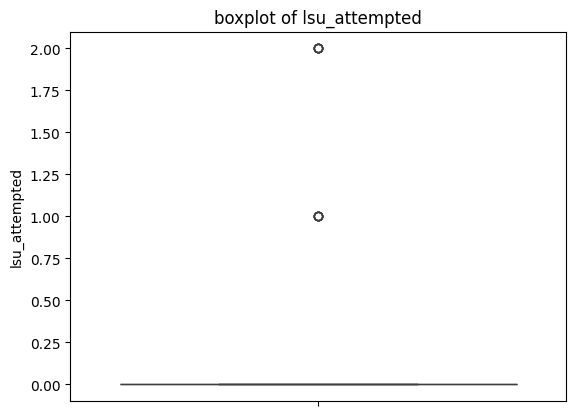

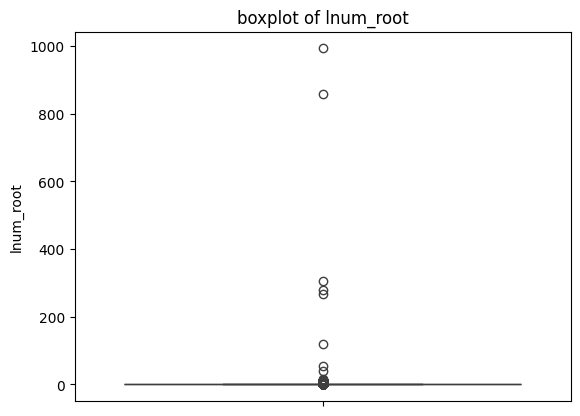

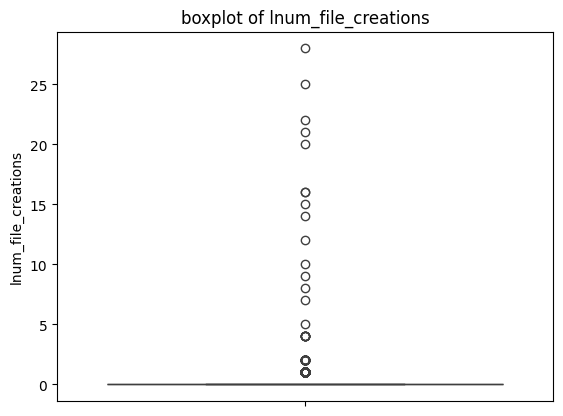

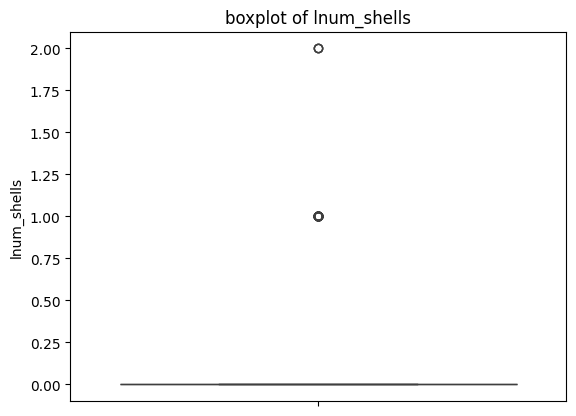

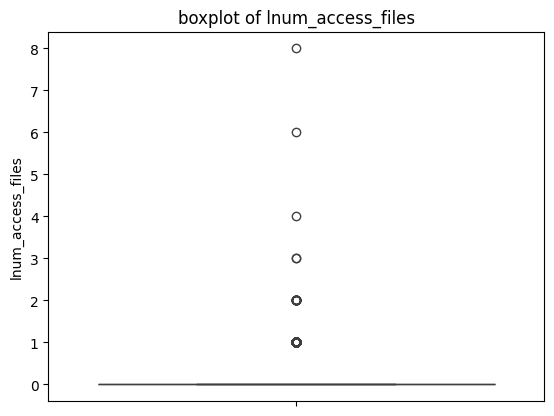

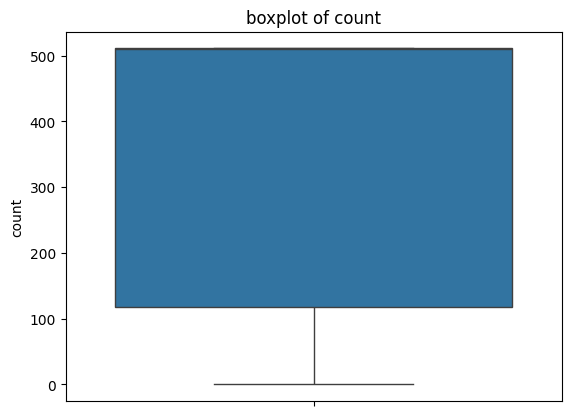

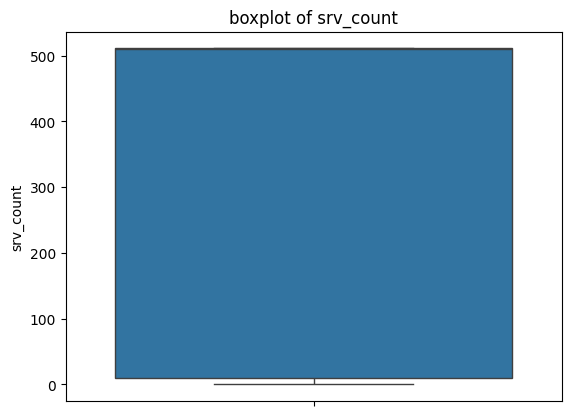

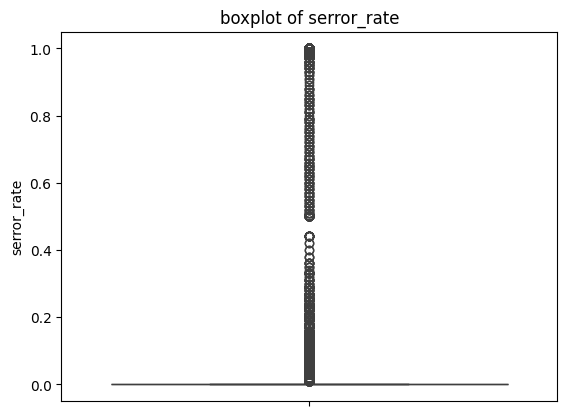

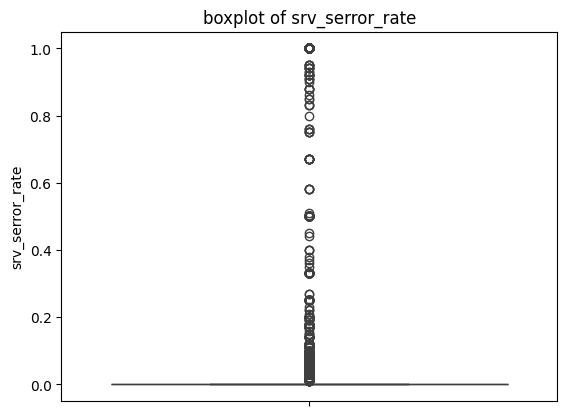

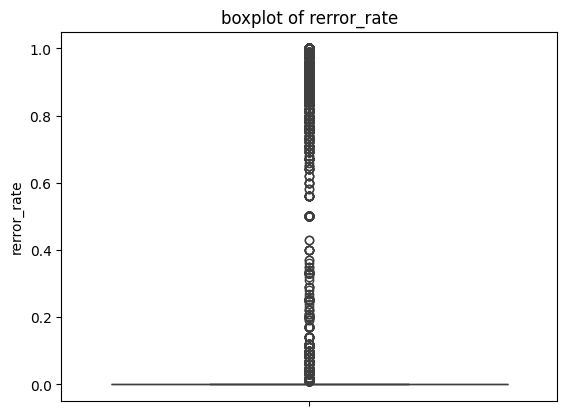

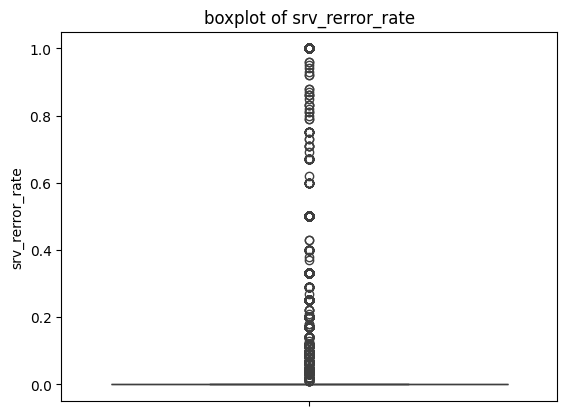

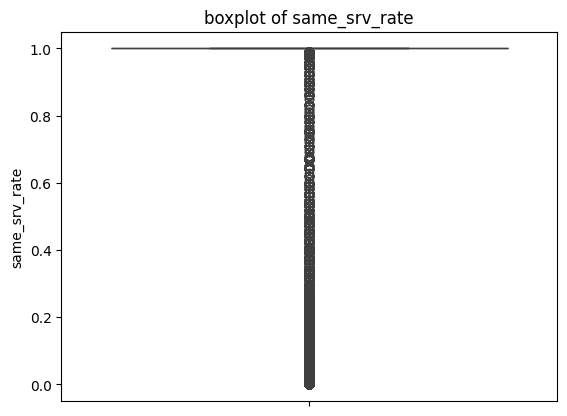

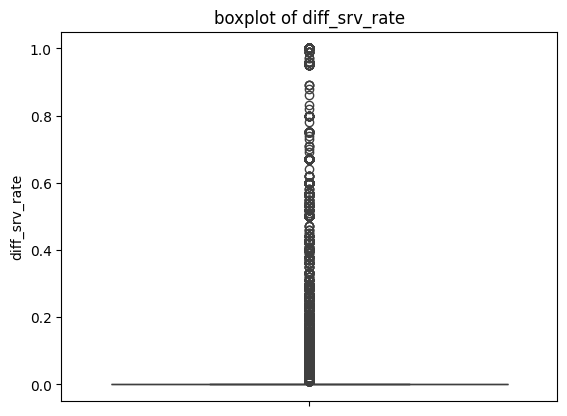

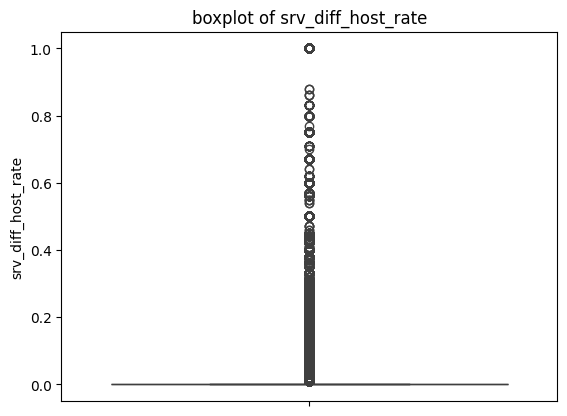

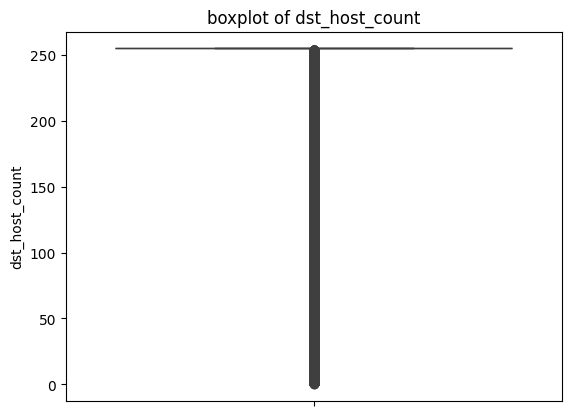

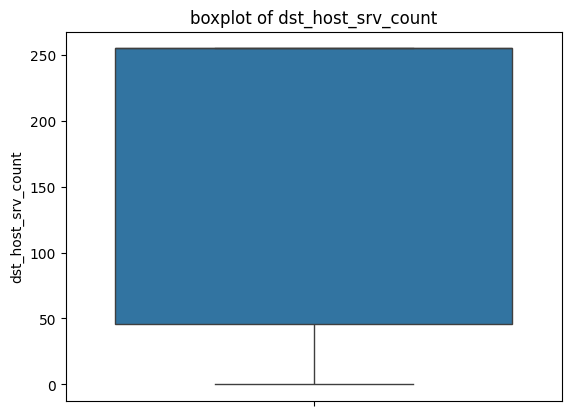

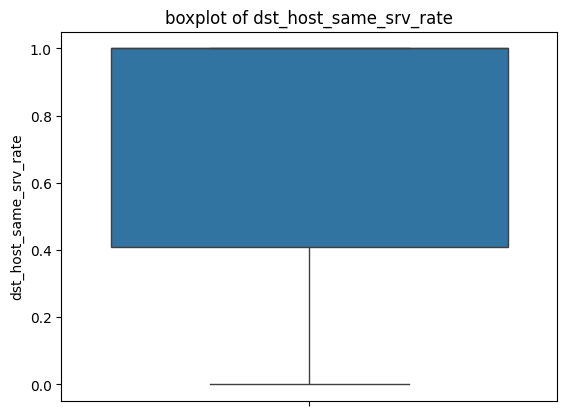

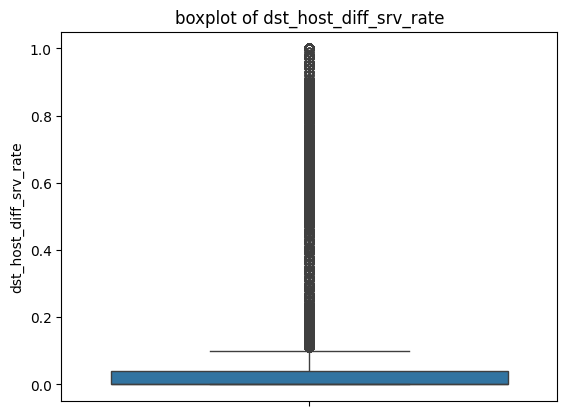

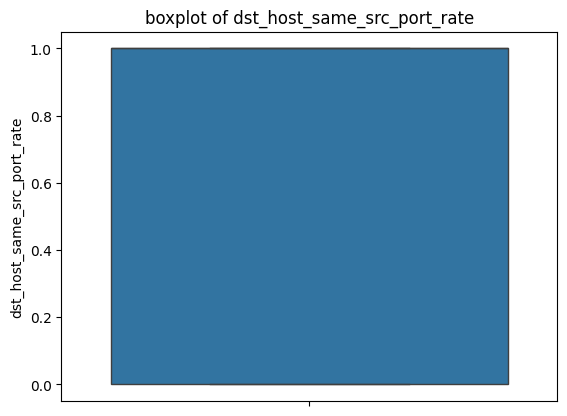

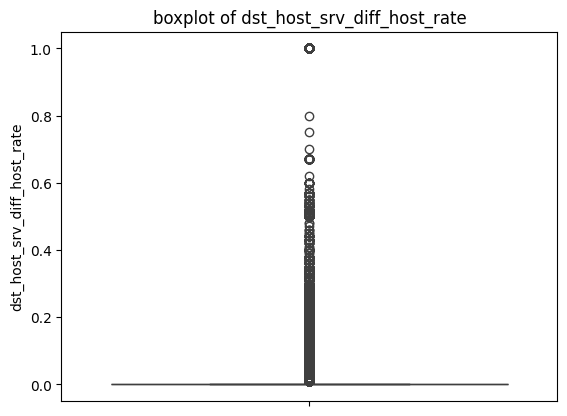

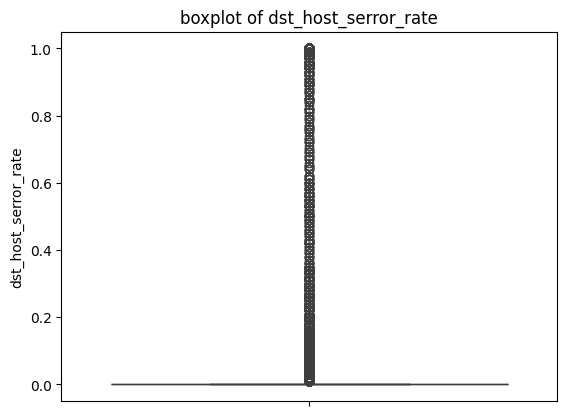

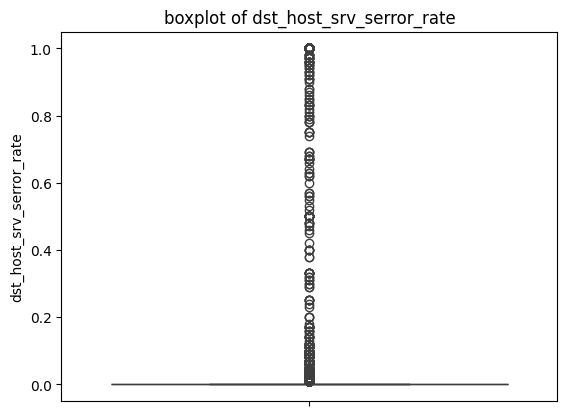

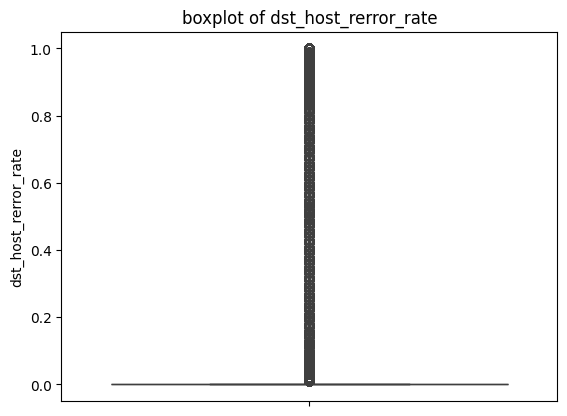

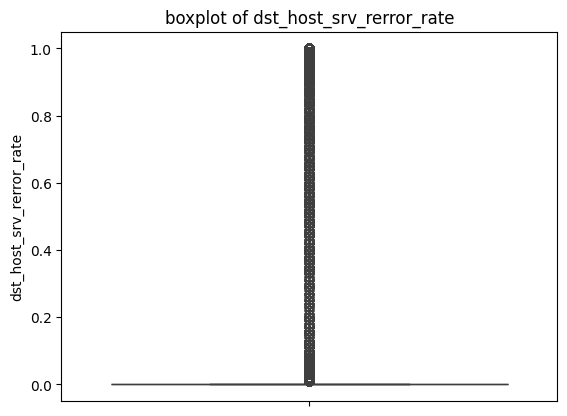

In [24]:
for col in numerical_cols:
    sns.boxplot(df[col])
    plt.title(f"boxplot of {col}")
    plt.show()

In [30]:
def detect_outliers_iqr(df, cols):
    outlier_summary = {}
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q2 = df[col].quantile(0.75)
        IQR = Q2 - Q1
        lower = Q1 - 1.5*IQR
        upper = Q2 + 1.5*IQR
        outliers = df[(df[col]<lower) | (df[col] > upper)].shape[0]
        outlier_summary[col] = outliers
    return pd.Series(outlier_summary).sort_values(ascending=False)

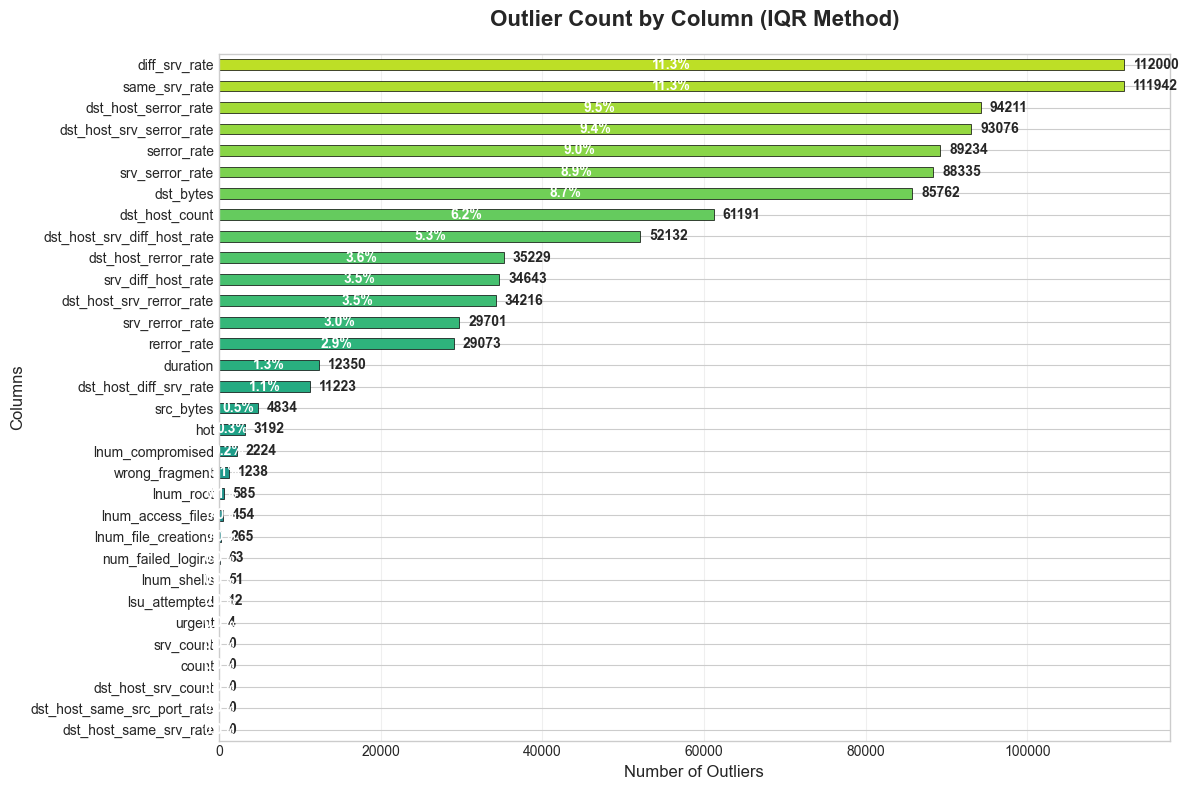

In [44]:
iqr_outliers = detect_outliers_iqr(df, numerical_cols)

# Sort for better visualization
iqr_outliers_sorted = iqr_outliers.sort_values(ascending=True)

plt.figure(figsize=(12, 8))
ax = iqr_outliers_sorted.plot(kind='barh', 
                               color=plt.cm.viridis(np.linspace(0.3, 0.9, len(iqr_outliers))),
                               edgecolor='black', 
                               linewidth=0.5)

plt.title('Outlier Count by Column (IQR Method)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Number of Outliers', fontsize=12)
plt.ylabel('Columns', fontsize=12)

# Add value labels at the end of bars
for i, (col, v) in enumerate(iqr_outliers_sorted.items()):
    ax.text(v + max(iqr_outliers)*0.01, i, f'{v}', 
            va='center', fontsize=10, fontweight='bold')

# Add percentage of total outliers
total_outliers = iqr_outliers.sum()
for i, (col, v) in enumerate(iqr_outliers_sorted.items()):
    percentage = (v / total_outliers * 100) if total_outliers > 0 else 0
    ax.text(v/2, i, f'{percentage:.1f}%', 
            va='center', ha='center', color='white', fontweight='bold')

plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

In [34]:
iqr_outliers

diff_srv_rate                  112000
same_srv_rate                  111942
dst_host_serror_rate            94211
dst_host_srv_serror_rate        93076
serror_rate                     89234
srv_serror_rate                 88335
dst_bytes                       85762
dst_host_count                  61191
dst_host_srv_diff_host_rate     52132
dst_host_rerror_rate            35229
srv_diff_host_rate              34643
dst_host_srv_rerror_rate        34216
srv_rerror_rate                 29701
rerror_rate                     29073
duration                        12350
dst_host_diff_srv_rate          11223
src_bytes                        4834
hot                              3192
lnum_compromised                 2224
wrong_fragment                   1238
lnum_root                         585
lnum_access_files                 454
lnum_file_creations               265
num_failed_logins                  63
lnum_shells                        51
lsu_attempted                      12
urgent      

In [45]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


In [49]:
df = df.drop('label',axis=1)

In [50]:
df.to_csv("dataframe_for_preprocessing.csv")